## 📈 Regression on Yes Bank Data: Price Prediction
  #### By Shifa Shaikh

### Problem statement
**This project aims to analyze historical stock market data of Yes Bank and develop machine learning models to predict future stock closing prices. By examining patterns in Open, High, Low, and Close prices over time, the study seeks to assist investors and financial analysts in making informed investment decisions and identifying potential market trends.**

#### Importing packages

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


#### The dataset was successfully loaded using:

In [6]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\data_YesBank.csv")
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### 📊 Variable Description
**1. date**-Date of the record.<br>
**2. open**-The opening price of the stock for the day.<br>
**3. high**-The highest price reached by the stock during the day.<br>
**4. low**-The lowest price reached by the stock during the day.<br>
**5. close**-The closing price of the stock for the day.<br>



#### head(): Displays the first 5 rows to give a quick preview of the data, showing the initial entries for all columns.



In [9]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#### shape: Reveals the structure of the dataset, showing how many rows and columns it contains.

In [11]:
df.shape

(185, 5)

#### Duplicate Records:The dataset contains no duplicate rows. Each entry is unique.

In [13]:
df.duplicated().sum()

0

#### Null Values:There are no missing (null) values in the dataset. All columns contain complete data.

In [15]:
print(df.isnull().sum)

<bound method DataFrame.sum of       Date   Open   High    Low  Close
0    False  False  False  False  False
1    False  False  False  False  False
2    False  False  False  False  False
3    False  False  False  False  False
4    False  False  False  False  False
..     ...    ...    ...    ...    ...
180  False  False  False  False  False
181  False  False  False  False  False
182  False  False  False  False  False
183  False  False  False  False  False
184  False  False  False  False  False

[185 rows x 5 columns]>


#### describe(): Provides a statistical summary of the numerical columns in the dataset — including count, mean, min, max, and quartiles.

In [17]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


#### info(): Provides a detailed overview of the DataFrame, including the number of non-null values and data types for each column.



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### columns: Displays a list of column names in the DataFrame



In [21]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [22]:
df['Open'].unique()

array([ 13.  ,  12.58,  13.48,  13.2 ,  13.35,  13.49,  13.68,  15.5 ,
        16.2 ,  20.56,  19.8 ,  18.2 ,  16.  ,  15.9 ,  18.  ,  18.78,
        22.8 ,  25.4 ,  27.4 ,  30.2 ,  29.3 ,  27.  ,  30.66,  33.89,
        35.98,  37.5 ,  37.4 ,  41.8 ,  44.4 ,  46.4 ,  49.99,  50.88,
        48.9 ,  33.9 ,  34.3 ,  31.22,  22.85,  25.  ,  26.68,  24.6 ,
        14.79,  12.4 ,  15.28,  12.19,  10.  ,  10.04,  15.94,  25.6 ,
        29.7 ,  31.98,  33.8 ,  41.2 ,  46.58,  50.98,  53.6 ,  49.  ,
        47.8 ,  50.67,  56.94,  56.7 ,  53.55,  59.4 ,  62.8 ,  70.9 ,
        72.2 ,  61.8 ,  62.98,  53.  ,  51.84,  62.  ,  61.26,  60.4 ,
        63.  ,  62.9 ,  56.  ,  53.8 ,  62.2 ,  57.  ,  47.92,  65.9 ,
        69.  ,  73.62,  70.4 ,  65.45,  68.15,  73.  ,  66.2 ,  76.4 ,
        82.54,  89.2 ,  93.2 , 104.41,  94.  ,  85.7 , 100.99,  99.  ,
        92.4 ,  66.  ,  49.2 ,  58.  ,  74.  ,  74.4 ,  74.74,  61.54,
        60.52,  83.45,  88.8 , 114.8 , 108.43, 107.4 , 114.6 , 112.1 ,
      

#### unique(): Displays the unique values in a specific column, helping identify distinct entries.



In [24]:
for i in  df.columns:
    print(i,"\n",df[i].unique(),"\n")


Date 
 ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 'Jul-14

#### 📅 Date-Time Conversion:"Converting String to DateTime format"

In [26]:

df=pd.read_csv("C:\\Users\\HP\Downloads\\data_YesBank.csv")
df['Date'] = pd.to_datetime('01-' + df['Date'], format='%d-%b-%y',errors='coerce')
print(df)

          Date   Open   High    Low  Close
0   2005-07-01  13.00  14.00  11.25  12.46
1   2005-08-01  12.58  14.88  12.55  13.42
2   2005-09-01  13.48  14.87  12.27  13.30
3   2005-10-01  13.20  14.47  12.40  12.99
4   2005-11-01  13.35  13.88  12.88  13.41
..         ...    ...    ...    ...    ...
180 2020-07-01  25.60  28.30  11.10  11.95
181 2020-08-01  12.00  17.16  11.85  14.37
182 2020-09-01  14.30  15.34  12.75  13.15
183 2020-10-01  13.30  14.01  12.11  12.42
184 2020-11-01  12.41  14.90  12.21  14.67

[185 rows x 5 columns]


In [27]:
df.head(20)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
5,2005-12-01,13.49,14.44,13.00,13.71
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49


In [28]:
print(df['Date'].dtype)

datetime64[ns]


#### 📅 Extracting the Year,Month,Day : Creating a New Column from Date

In [30]:
df['year'] = df['Date'].dt.year
df

,Date,Open,High,Low,Close,year
0,2005-07-01,13.00,14.00,11.25,12.46,2005
1,2005-08-01,12.58,14.88,12.55,13.42,2005
2,2005-09-01,13.48,14.87,12.27,13.30,2005
3,2005-10-01,13.20,14.47,12.40,12.99,2005
4,2005-11-01,13.35,13.88,12.88,13.41,2005
...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020
181,2020-08-01,12.00,17.16,11.85,14.37,2020
182,2020-09-01,14.30,15.34,12.75,13.15,2020
183,2020-10-01,13.30,14.01,12.11,12.42,2020


In [31]:
df['Month'] = df['Date'].dt.month
df

,Date,Open,High,Low,Close,year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11
...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7
181,2020-08-01,12.00,17.16,11.85,14.37,2020,8
182,2020-09-01,14.30,15.34,12.75,13.15,2020,9
183,2020-10-01,13.30,14.01,12.11,12.42,2020,10


In [32]:
df['day'] = df['Date'].dt.day
df

,Date,Open,High,Low,Close,year,Month,day
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,1
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,1
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,1
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,1
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,1
...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7,1
181,2020-08-01,12.00,17.16,11.85,14.37,2020,8,1
182,2020-09-01,14.30,15.34,12.75,13.15,2020,9,1
183,2020-10-01,13.30,14.01,12.11,12.42,2020,10,1


In [33]:
df['day'] = df['Date'].dt.day_name()
df

,Date,Open,High,Low,Close,year,Month,day
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,Friday
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,Monday
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,Thursday
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,Saturday
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,Tuesday
...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7,Wednesday
181,2020-08-01,12.00,17.16,11.85,14.37,2020,8,Saturday
182,2020-09-01,14.30,15.34,12.75,13.15,2020,9,Tuesday
183,2020-10-01,13.30,14.01,12.11,12.42,2020,10,Thursday


#### Weekend Checker Function: Identifying Saturdays and Sundays

In [35]:
def weekend(x):
    if x=='Saturday'or x=='Sunday':
        return 1
    return 0

#### Marking Weekends in the Data

In [37]:
df['weekend']=df['day'].apply(weekend)
df

,Date,Open,High,Low,Close,year,Month,day,weekend
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,Friday,0
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,Monday,0
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,Thursday,0
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,Saturday,1
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,Tuesday,0
...,...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7,Wednesday,0
181,2020-08-01,12.00,17.16,11.85,14.37,2020,8,Saturday,1
182,2020-09-01,14.30,15.34,12.75,13.15,2020,9,Tuesday,0
183,2020-10-01,13.30,14.01,12.11,12.42,2020,10,Thursday,0


In [38]:
df.shape

(185, 9)

In [39]:
print(df['day'].dtype)

object


#### Since day is categorical data,let's change datatype of it:

In [41]:
df['day']=df['day'].astype('category')
print(df['day'].dtypes)  

category


In [42]:
print(df['Month'].dtypes) 

int32


In [43]:
print(df['weekend'].dtypes) 

int64


#### Exploratory data analysis
#### 1. Univariate analysis



#### Histogram of Close Prices

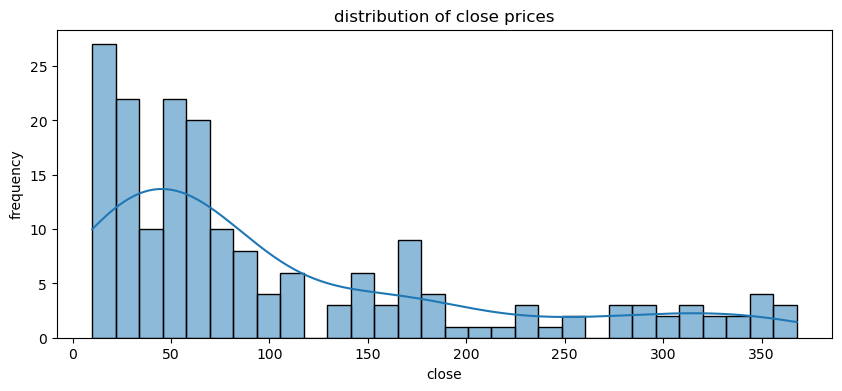

In [46]:
plt.figure(figsize=(10,4))
sns.histplot(df['Close'],kde=True,bins=30)
plt.title("distribution of close prices")
plt.xlabel("close")
plt.ylabel("frequency")
plt.show()

#### observations

1.The distribution is right-skewed
This means most closing prices are on the lower side, and only a few times the price was very high.
2.Most values are between ₹0 and ₹100
It shows that Yes Bank stock usually closed at lower prices, and high prices are not common.



In [49]:
df.head(2)

,Date,Open,High,Low,Close,year,Month,day,weekend
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,Friday,0
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,Monday,0


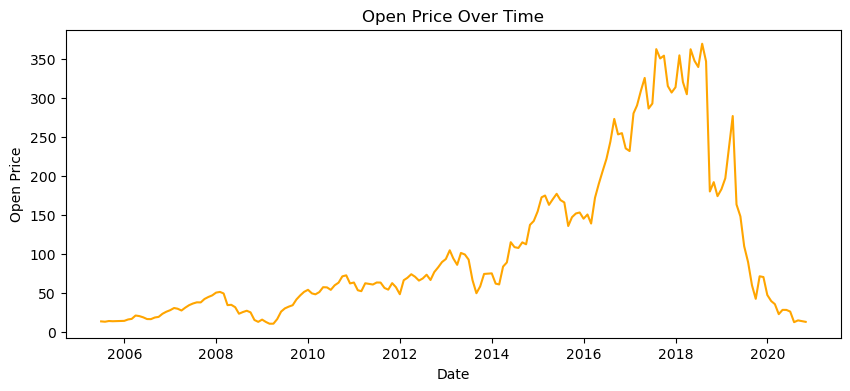

In [50]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Date', y='Open', data=df, color='orange')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()
# Insight: Trends or volatility over time are visible her


#### Bar Plot

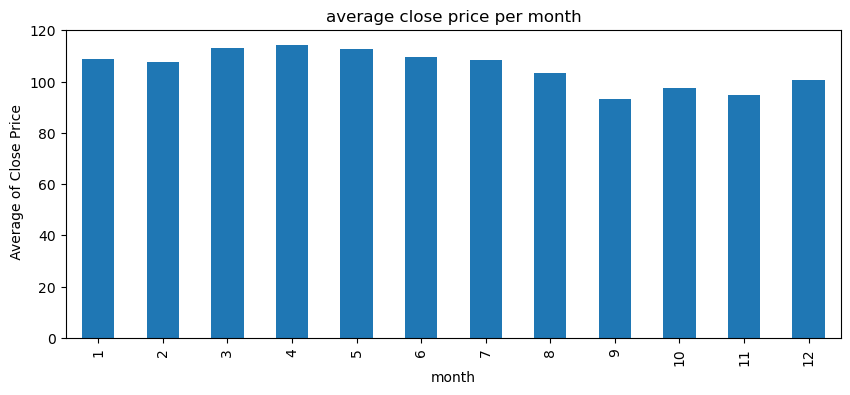

In [52]:
monthly_avg=df.groupby('Month')['Close'].mean()
monthly_avg.plot(kind='bar',
figsize=(10,4))
plt.title("average close price per month")
plt.ylabel(" Average of Close Price")
plt.xlabel("month")
plt.show()


#### observations

1.April has the highest average closing price
This means Yes Bank's stock usually performs best in April.

2.November has the lowest average price
So, the stock performs the worst in November on average.



#### Bivariate analysis: 
Bivariate analysis is a visualization when two variables are involved

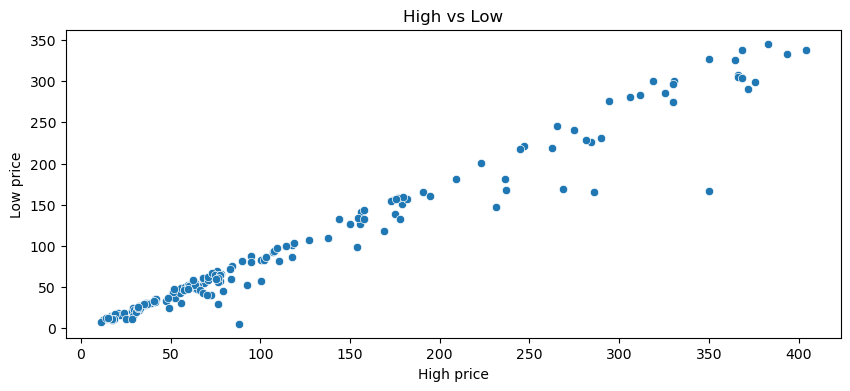

In [56]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=df['High'],y=df['Low'])
plt.title("High vs Low")
plt.xlabel("High price")
plt.ylabel("Low price")
plt.show()

#### observation
The scatter plot shows a strong positive correlation between high and low prices. As the high price increases, the low price also tends to rise proportionally.

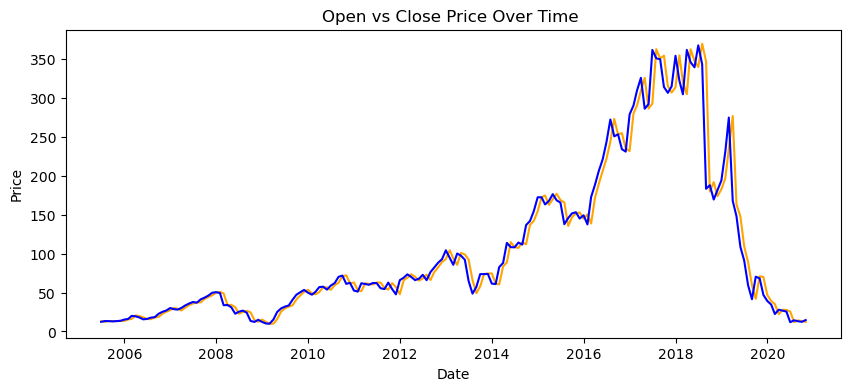

In [58]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Open'], label='Open Price', color='orange')
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Open vs Close Price Over Time ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### Observation:
The stock prices of Yes Bank showed a steady growth from 2005 to 2018, reaching their peak around 2018. However, after 2018, there was a sharp and continuous decline in both open and close prices, indicating a major financial downturn for the bank.

#### BarPlot

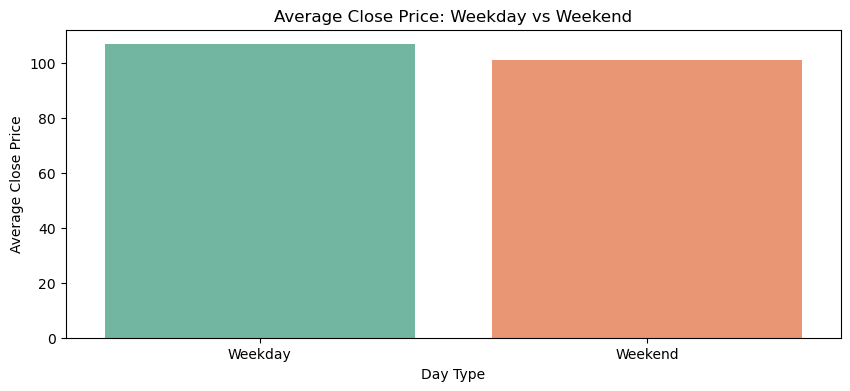

In [60]:
plt.figure(figsize=(10,4))
sns.barplot(x='weekend', y='Close', data=df, ci=None, palette='Set2')
plt.title('Average Close Price: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average Close Price')
plt.xticks([0, 1], ['Weekday', 'Weekend']) 
plt.show()

#### observation
he average close price is slightly higher on weekdays compared to weekends. This suggests that stock prices tend to perform better during the weekday trading sessions.

#### 3. Multivariate analysis:
**Multivariate analysis is the process of examining more than two variables simultaneously to understand the relationships between them. It helps identify patterns and interactions that might not be visible when looking at only one or two variables at a time.**



 #### Line Plot

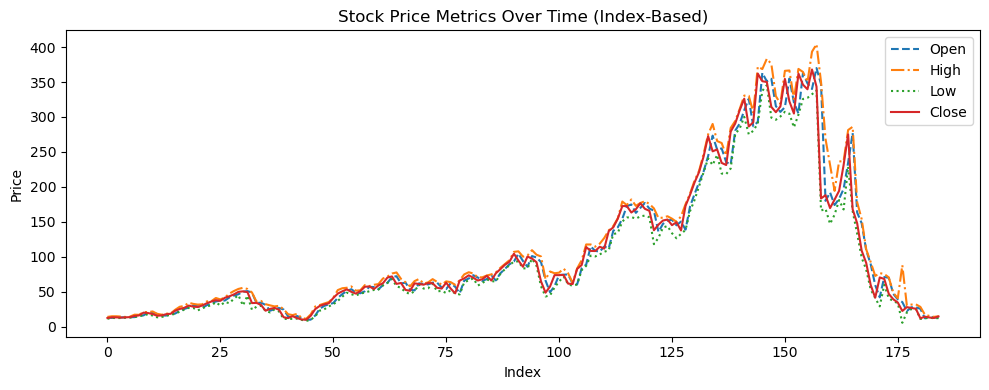

In [64]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Open'], label='Open', linestyle='--')
plt.plot(df.index, df['High'], label='High', linestyle='-.')
plt.plot(df.index, df['Low'], label='Low', linestyle=':')
plt.plot(df.index, df['Close'], label='Close', linestyle='-')
plt.title('Stock Price Metrics Over Time (Index-Based)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

#### Observation:
1.The Open, Close, and Low stock prices of Yes Bank moved closely together, showing a consistent upward trend until around index 140, followed by a sharp decline. 
2.The High price consistently remained above the other three metrics but followed the same overall trend, peaking higher during the stock’s growth phase and declining sharply during the downturn.

#### Heatmap

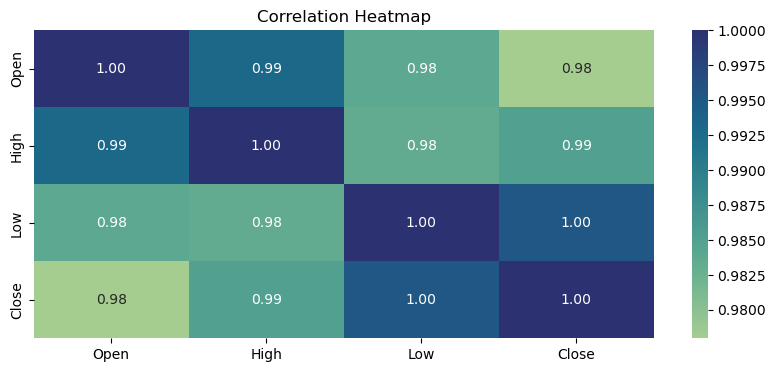

In [66]:
plt.figure(figsize=(10, 4))
correlation_matrix=df[['Open','High','Low','Close']].corr()
sns.heatmap(correlation_matrix, annot=True,  cmap="crest", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### observation
The heatmap shows a very strong positive correlation between all the variables (Open, High, Low, Close) in the dataset. Notably, 'Close' and 'Low' prices have a perfect correlation of 1.00, indicating they move together almost identically.

#### Box Plot
A boxplot is a graphical representation used to detect outliers by displaying the distribution of a dataset through its minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum
where values falling below (Q1 - 1.5 × IQR) or above (Q3 + 1.5 × IQR) are considered outliers.

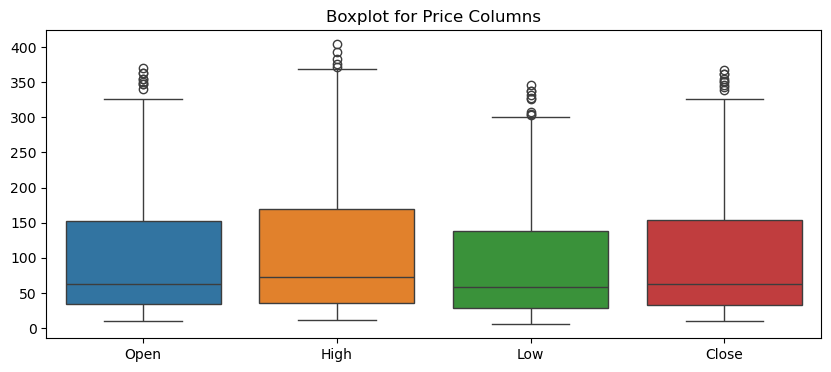

In [69]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot for Price Columns')
plt.show()

#### Detecting outlier

In [71]:
for col in ['Open', 'High', 'Low', 'Close']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} has {len(outliers)} outliers")

Open has 9 outliers
High has 5 outliers
Low has 9 outliers
Close has 9 outliers


#### Removing outliers
  We remove outliers because:
   1.Outliers can distort results, making models less accurate by pulling averages and regression lines away from true patterns.

2.Outliers can indicate errors (like data entry mistakes) or rare special cases that we may not want to model.

In [73]:
df_cleaned = df.copy() 
for col in ['Open', 'High', 'Low', 'Close']:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
print("After removing outliers:", df_cleaned.shape)


After removing outliers: (155, 9)


In [74]:
df.head()

,Date,Open,High,Low,Close,year,Month,day,weekend
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,Friday,0
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,Monday,0
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,Thursday,0
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,Saturday,1
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,Tuesday,0


In [75]:
df.head()

,Date,Open,High,Low,Close,year,Month,day,weekend
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,Friday,0
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,Monday,0
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,Thursday,0
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,Saturday,1
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,Tuesday,0


In [76]:
df = df.drop(['Date', 'Month', 'day'],axis=1)

In [77]:
df.index

RangeIndex(start=0, stop=185, step=1)

#### Model Preparation 

In [79]:
x = df.drop(['Close'], axis=1)
y = df['Close']

#### Train test split

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Importing Linear regression 

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Predicting the scores

In [87]:
y_pred = lr.predict(x_test)
y_pred


array([ 29.35215733,  13.92931539, 375.8658923 , 127.2551002 ,
       315.16987675,  24.81640528,  41.79230436,  60.10633288,
       166.08107288,  65.2531822 ,  46.7016333 , 196.02364901,
        66.42068861,  39.15595634,  14.58233603,  25.39838133,
        44.41990467,  27.01101071,  61.76241529,  51.6331908 ,
       178.93720296, 155.78526196, 375.60361749,  34.9613979 ,
        21.63644563, 134.56734129,  59.2064423 ,  31.79506732,
        53.02240312, 146.3110317 ,  58.73771063,  47.97880368,
       166.80322667, 264.30802266,  54.73446526,  53.47478611,
        37.54634506])

#### Checking Accuracy

In [89]:
print(" Training Score:",(lr.score(x_train,y_train))*100)
print(" Testing Score:",(lr.score(x_test,y_test))*100)

 Training Score: 99.62517846209266
 Testing Score: 98.95719140964063


#### Evaluation metrics

In [91]:
# Importing Evaluation metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 94.25772983044402
RMSE : 9.708642017833597
R2 Linear regression : 98.95719140964063


#### Difference

In [93]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred.astype(int), "Difference" : abs(y_test - y_pred)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
111,136.83,127,9.574900
124,153.30,155,2.485262
29,49.81,53,3.664786
19,28.63,29,0.722157
56,50.97,51,0.663191
163,231.20,196,35.176351
42,12.24,13,1.689315
51,47.31,44,2.890095
15,22.78,24,2.036405
9,19.49,21,2.146446


#### Visualise

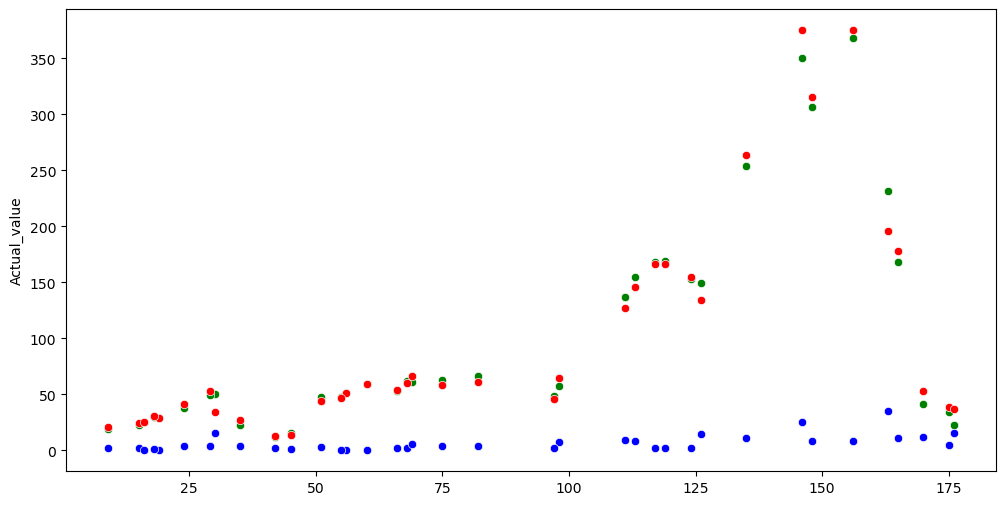

In [95]:
plt.figure(figsize = (12,6))
sns.scatterplot(diff['Actual_value'], color = 'g')
sns.scatterplot(diff['Predicted_Value'], color = 'r')
sns.scatterplot(diff['Difference'], color = 'b')
plt.show()

#### Decision tree regressor


In [97]:
# Importing the packages
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=14)

# Fitting the train model
decision_tree.fit(x_train, y_train)

# Predicting from the model 
DT_y_pred = decision_tree.predict(x_test)
DT_y_train = decision_tree.predict(x_train)

# Finding the error
MSE = mean_squared_error(y_test,DT_y_pred)
print("MSE:", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

# Adjusted r2
r2 = r2_score(y_test, DT_y_pred)
print("R2 for Decision Tree Regressor : ", r2*100)

MSE: 269.59264054054046
RMSE : 16.419276492602847
R2 for Decision Tree Regressor :  97.01739558167739


#### Checking the Accuracy¶

In [99]:
print("Trainig Score: ",(decision_tree.score(x_train, y_train))*100,"%")
print("Testing Score: ",(decision_tree.score(x_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  97.01739558167739 %


#### Difference

In [101]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': DT_y_pred, 'Difference': y_test - DT_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
176,22.45,82.70,-60.25
68,61.98,62.38,-0.40
146,350.00,351.15,-1.15
98,57.50,82.70,-25.20
42,12.24,12.46,-0.22
113,154.57,145.23,9.34
51,47.31,39.20,8.11
135,253.52,272.56,-19.04
19,28.63,31.93,-3.30
170,41.45,72.85,-31.40



#### Random Forest Regresoor

In [103]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor

# Setting the hyperparameter values
random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(x_train,y_train)
rf_y_pred = random_forest.predict(x_test)

# Mean squared error
MSE = mean_squared_error(y_test, rf_y_pred)
print("MSE :", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R2
r2 = r2_score(y_test, rf_y_pred)
print("R2 for Random Forest :", r2*100)

MSE : 220.68696862988992
RMSE : 14.855536632174886
R2 for Random Forest : 97.55845735854666


 #### Checking the Accuracy

In [105]:
print("Trainig Score: ",(random_forest.score(x_train, y_train))*100,"%")
print("Testing Score: ",(random_forest.score(x_test, y_test))*100,"%")

Trainig Score:  99.81452270866778 %
Testing Score:  97.55845735854666 %


#### Difference


In [107]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rf_y_pred, 'Difference': y_test - rf_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
29,49.81,50.09265,-0.28265
111,136.83,113.15750,23.67250
126,149.38,135.76400,13.61600
117,167.96,169.88910,-1.92910
9,19.49,18.34400,1.14600
35,22.85,30.91420,-8.06420
113,154.57,143.67500,10.89500
163,231.20,189.67550,41.52450
24,37.93,41.63335,-3.70335
55,47.32,48.08090,-0.76090


#### Support Vector Machine (SVM):

In [109]:
from sklearn.svm import SVR
# Setting the hyperparameter values
svm_m = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_m.fit(x_train, y_train)
svm_y_pred = svm_m.predict(x_test)
# Mean squared error
MSE = mean_squared_error(y_test, svm_y_pred)
print("MSE :", MSE)
# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)
# R2 Score
r2 = r2_score(y_test, svm_y_pred)
print("R2 for SVM :", r2*100)

MSE : 134.97482410581932
RMSE : 11.617866590119691
R2 for SVM : 98.5067229360076


#### Checking the Accuracy

In [111]:
print("Training Score: ", (svm_m.score(x_train, y_train)) * 100, "%")
print("Testing Score: ", (svm_m.score(x_test, y_test)) * 100, "%")

Training Score:  99.40725389713472 %
Testing Score:  98.5067229360076 %


In [112]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': svm_y_pred, 'Difference': y_test - svm_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
16,25.32,24.041879,1.278121
98,57.50,58.610850,-1.110850
163,231.20,189.346592,41.853408
119,168.60,170.304785,-1.704785
24,37.93,35.841102,2.088898
75,62.90,56.165975,6.734025
97,48.65,54.655962,-6.005962
9,19.49,19.242385,0.247615
68,61.98,57.843069,4.136931
135,253.52,278.020392,-24.500392


#### Difference


#### KNeighborsRegressor

In [115]:
from sklearn.neighbors import KNeighborsRegressor
# Setting the hyperparameter values
knn_m = KNeighborsRegressor(n_neighbors=5)
knn_m.fit(x_train, y_train)
knn_y_pred = knn_m.predict(x_test)

In [116]:
# Mean squared error
MSE = mean_squared_error(y_test, knn_y_pred)
print("MSE :", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# R2 Score
r2 = r2_score(y_test, knn_y_pred)
print("R2 for KNN :", r2 * 100)


MSE : 398.92002183783774
RMSE : 19.97298229703911
R2 for KNN : 95.58659829398435


#### Checking the Accuracy

In [118]:
print("Training Score: ", (knn_m.score(x_train, y_train)) * 100, "%")
print("Testing Score: ", (knn_m.score(x_test, y_test)) * 100, "%")

Training Score:  98.08589072340361 %
Testing Score:  95.58659829398435 %


#### Difference

In [120]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': knn_y_pred, 'Difference': y_test - knn_y_pred})
predicted_value.sample(10)


,Actual Value,Predicted Value,Difference
126,149.38,150.710,-1.330
176,22.45,43.928,-21.478
18,30.16,35.620,-5.460
75,62.90,64.458,-1.558
113,154.57,150.628,3.942
98,57.50,71.786,-14.286
156,367.90,309.590,58.310
66,52.59,64.458,-11.868
117,167.96,162.362,5.598
135,253.52,307.128,-53.608


#### cross validation

In [122]:
from sklearn.model_selection import cross_val_score

#### Decision tree regressor


In [124]:
print("Training:", ((cross_val_score(decision_tree ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(decision_tree , x_test, y_test))*100).mean().astype(int), "%")

Training: 97 %
Testing: 92 %


#### Random Forest Regresoor

In [126]:
print("Training:", ((cross_val_score(random_forest ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(random_forest , x_test, y_test))*100).mean().astype(int), "%")

Training: 98 %
Testing: 95 %


#### Support Vector Machine (SVM):

In [128]:
print("Training:", ((cross_val_score(svm_m  ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(svm_m , x_test, y_test))*100).mean().astype(int), "%")

Training: 98 %
Testing: 91 %


#### KNeighborsRegressor

In [130]:
print("Training:", ((cross_val_score(knn_m  ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(knn_m  , x_test, y_test))*100).mean().astype(int), "%")

Training: 96 %
Testing: 87 %


#### Linear Regression

In [132]:
print("Training:", ((cross_val_score(lr ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(lr , x_test, y_test))*100).mean().astype(int), "%")

Training: 99 %
Testing: 96 %


#### printing all the accuracy using dataframe

In [134]:
overall_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100),
                              'Decision Tree Regressor': ((decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100),
                              'Random Forest Regressor': ((random_forest .score(x_train, y_train))*100, (random_forest .score(x_test, y_test))*100),
                               'KNeighbors Regressor': ((knn_m.score(x_train, y_train))*100, (knn_m.score(x_test, y_test))*100),
                               'Support Vector Regressor': ((svm_m.score(x_train, y_train))*100, (svm_m.score(x_test, y_test))*100)})
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,99.625178,98.957191
Decision Tree Regressor,100.000000,97.017396
Random Forest Regressor,99.814523,97.558457
KNeighbors Regressor,98.085891,95.586598
Support Vector Regressor,99.407254,98.506723


#### Observations

**1. Decision Tree**:
Training accuracy is high (100%) but a slight drop in testing (97.01%) suggests mild overfitting.

**2. Random Forest**:
Strong performance with 99.81% training and 97.55% testing accuracy leads to  great generalization.

**3. SVM**:
Very high training score (99.40%) but slightly lower test score (98.50%) suggest reliable performance with slight overfitting.

**4. KNN**:
Decent training accuracy (98.08%) but notable drop in testing (95.58%)-indicates potential underfitting or sensitivity to data distribution.

**5. Linear Regression**
Excellent performance with 99.62% training and 98.95% testing -consistent and well-generalized model.

